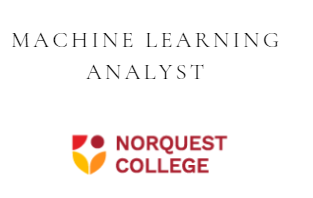

# Clustering Technique

For clustering, we can explore grouping the properties based on similarities in their features. Common approaches for clustering in this context include:


1. **Property Type Clustering**: Clustering based on features like property type, size, number of bedrooms/bathrooms, etc.
2. **Location Clustering**: Grouping properties based on geographical coordinates if available, or based on location descriptors.

Let's focus on clustering based on property features. We can use algorithms like K-Means for this task. The process involves:

1. **Feature Selection**: Choosing the features that will be used for clustering.
2. **Preprocessing**: Scaling the features and handling categorical data.
3. **Choosing the Number of Clusters**: Determining the optimal number of clusters.
4. **Clustering**: Applying the clustering algorithm.
5. **Analysis**: Examining the clusters to understand their characteristics.

Let's start by selecting the features and applying the K-Means clustering algorithm. We'll cluster the properties based on their size, number of bedrooms, and bathrooms. We'll also include the property type after encoding it.




# Load cleaned data from previous EDA

In [ ]:
# load Food_Drive_2024.csv

import pandas as pd
data = pd.read_csv('Food_Drive_2024.csv')


In [ ]:
# drop column
data = data.drop(columns=['Start time','Completion time'])

In [ ]:
data.head()

,ï»¿ID,Location,Stake,Ward/Branch,Route,Time Spent Collecting Donations,# of Adult Volunteers,# of Youth Volunteers,Doors in Route,Donation Bags Collected,...,Additional routes completed (3 routes),Additional routes completed (3 routes)2,Additional routes completed (More than 3 Routes),Additional routes completed (More than 3 Routes)2,Additional routes completed (More than 3 Routes)3,Neighbourhood,Assessed Value,Latitude,Longitude,Minutes Spent Collecting Donations
0,25,Londonberry Chapel,Bonnie Doon Stake,Clareview Ward,Unassigned,0 - 30 Minutes,1,0,1,1,...,NaN,NaN,NaN,NaN,NaN,CLAREVIEW,837500.0,53.550567,-113.454812,30
1,26,Gateway Stake Centre,Gateway Stake,Lee Ridge Ward,50,0 - 30 Minutes,2,2,20,20,...,NaN,NaN,NaN,NaN,NaN,LEE RIDGE,28618500.0,53.472321,-113.450288,30
2,27,Bonnie Doon Stake Centre,Bonnie Doon Stake,Forest Heights Ward,98,0 - 30 Minutes,2,2,20,15,...,NaN,NaN,NaN,NaN,NaN,FOREST HEIGHTS,837500.0,53.550567,-113.454812,30
3,28,Bearspaw Chapel,Gateway Stake,Lee Ridge Ward,6,30 - 60 Minutes,2,3,144,25,...,NaN,NaN,NaN,NaN,NaN,LEE RIDGE,28618500.0,53.472321,-113.450288,60
4,29,Gateway Stake Centre,Gateway Stake,Silver Berry Ward,19,30 - 60 Minutes,1,0,230,21,...,NaN,NaN,NaN,NaN,NaN,SILVER BERRY,162000.0,53.459216,-113.381804,60


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 23 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ï»¿ID                                              446 non-null    int64  
 1   Location                                           446 non-null    object 
 2   Stake                                              446 non-null    object 
 3   Ward/Branch                                        446 non-null    object 
 4   Route                                              446 non-null    object 
 5   Time Spent Collecting Donations                    446 non-null    object 
 6   # of Adult Volunteers                              446 non-null    int64  
 7   # of Youth Volunteers                              446 non-null    int64  
 8   Doors in Route                                     446 non-null    int64  
 9   Donation B

Clustering in Machine Learning requires using algorithms like K-Means or hierarchical clustering. These methods can help you identify inherent groupings within the data. In this Lab, we will be using K-Means clustering algorithm, which is widely used for its simplicity and effectiveness.

# Clustering based on property features

# Preprocess Data & fit using K-Means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer # to reconvert transformed columns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# Feature Selection for Clustering
X_clustering = ['Assessed Value', 'Donation Bags Collected']


# Preprocessing: Scaling and encoding
preprocessor_clustering = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_clustering),
        ('cat', OneHotEncoder(), ['Neighbourhood'])
    ]
)


X_processed = preprocessor_clustering.fit_transform(data)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 6)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_processed)
    inertia.append(kmeanModel.inertia_)




# Choose number of Clusters

We will use the **Elbow method** to find the optimal number of clusters.

The Elbow Method is  used in determining the optimal number of clusters (k) for K-means clustering. This method involves running the K-means clustering algorithm on the dataset for a range of values of k (for example, k from 1 to 10), and for each value of k, computing the sum of squared distances from each point to its assigned center (also known as within-cluster sum of squares, WCSS).

The Elbow Method graph helps to determine the optimal number of clusters by identifying the point at which the inertia, or within-cluster sum of squares, starts decreasing at a slower rate. This point is often considered a good trade-off between the number of clusters and the sum of squared distances to the nearest cluster center.



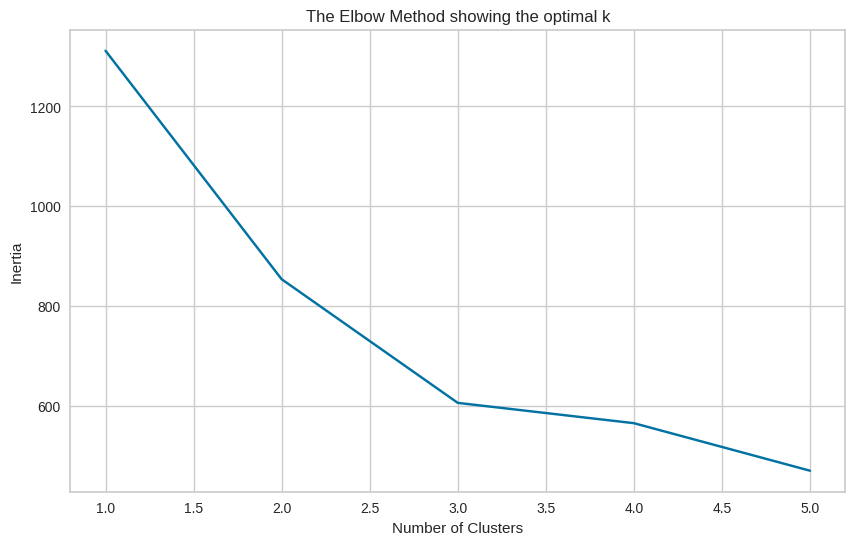

In [ ]:
# Plot the Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()



From the graph, the "elbow" isn't very distinct, which is a common issue in real-world datasets. However, we can make an educated guess. It seems that after 3 or 4 clusters, the decrease in inertia begins to plateau. Therefore, we could choose either 3 or 4 as the optimal number of clusters.

Now, we will apply the K-Means clustering algorithm using the chosen number of clusters, and then analyze the resulting clusters. Let's proceed with 3 clusters for this analysis.

# Perform KMeans Clustering

In [ ]:
# Applying K-Means Clustering with the chosen number of clusters
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_processed)

# Adding the cluster labels to the original dataset for analysis
data['Cluster'] = kmeans.labels_

# Selecting only the numeric columns for calculating the mean
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Analyzing the Clusters: Displaying the average numeric features of each cluster
cluster_summary = data.groupby('Cluster')[numeric_columns].mean()

# Display the average features of each cluster
print("Cluster Summary:")
print(cluster_summary)


Cluster Summary:
              ï»¿ID  # of Adult Volunteers  # of Youth Volunteers  \
Cluster                                                             
0        303.568182               2.204545               1.613636   
1        267.690476               2.095238               1.857143   
2        229.202532               2.034810               1.449367   

         Doors in Route  Donation Bags Collected  \
Cluster                                            
0            307.738636                62.943182   
1            138.833333                25.000000   
2            152.208861                22.522152   

         Completed More Than One Route  Routes Completed  Assessed Value  \
Cluster                                                                    
0                             0.556818          1.590909    1.472753e+06   
1                             0.380952          1.404762    2.861850e+07   
2                             0.196203          1.227848    1.589727e+06

In [ ]:
# Calculate Silhouette Score for 3 cluster
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_processed, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.3741330923202608


The K-Means clustering algorithm has grouped the properties into 3 clusters based on their features. Complete the summary of the average characteristics of each cluster. the first one has been done as an example.

### Cluster Summary:
   *Complete values for the clusters*
   **YOUR ANSWER HERE**
1. **Cluster 0**:
   - **Average Assessed Value (Price)**: $1,472,753
   - **Average Number of Adult Volunteers**: 2.20
   - **Average Number of Youth Volunteer**: 1.61
   - **Average Donation Bags Collected**: 62.94
   - **Average Minutes Spent Collecting Donations**: 89.66



2. **Cluster 1**:
   - **Average Assessed Value (Price)**: $28,618,500
   - **Average Number of Adult Volunteers**: 2.10
   - **Average Number of Youth Volunteer**: 1.86
   - **Average Donation Bags Collected**: 25.00
   - **Average Minutes Spent Collecting Donations**: 62.14

3. **Cluster 2**:
   - **Average Assessed Value (Price)**: $1,589,727
   - **Average Number of Adult Volunteers**: 2.03
   - **Average Number of Youth Volunteer**: 1.45
   - **Average Donation Bags Collected**: 22.52
   - **Average Minutes Spent Collecting Donations**: 61.23

   *Compare all clusters. *

   - *Which cluster is most expensive?* **Cluster 1 is the most expensive with an assessed value of $28,618.500**
   - *Which Cluster is smallest?* **Cluster 2 is the smallest in term of time spent collecting donations, averaging 61.23 minutes.**

**Interpretation:**
- Cluster 1: Despite Despite having the wealthiest properties, Cluster 1 only collected slightly more doantion bags than Cluster 2 (25 vs 22.52), and significantly less than Cluster 0 (62.94). This suggests that wealthier neighborhoods do not nexessarily contribute more to donation drives. The moderate time spent on collection (62.14 minutes) might indicate fewer volunteers or less engagement in these areas. Therefore, **Wealth and youth involvement alone do not guaurantee higher collection success in Cluster 1.**

- Cluster 2: shows the least community engagement, with fewer donation bags collected (22.52) and the shortest collection time (61.23 minutes). Despite having assessed values comparable to Cluster 0, it underperforms due to lower colunteer involvement and less time spent on collection. Therefore, **Cluster 2 reflects lower volunteer partipation, resulting in the lowest number of donation bags collected.**

- Cluster 0: demonstrates the highest collection effort, with the most donation bags collected (62.94) and the longest collection time (89.66 minutes), despite havingn the lowest property values. The higher number of adult volunteers and time spent on the drive suggest strong community engagement. Therefore, **Cluster 0 excels in donation efforts, showing that active community involvement and volunteer partipation are more critical for success than property wealth.**


**Conclusion**: Cluster 0 shows that active community involvement and adult volunteer partipation are more important for donation success than property wealth. Cluster 1, despite having the wealthiest properties, does not achieve greater collection success, highlighting that high property values alone do not guarantee better engagement. Cluster 2 underperforms due to lower volunteer involvement, leading to fewer donations collected.

# Make Predictions

In [ ]:
# Assuming the optimal number of clusters is determined to be 5
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_processed)


The Elbow Method is somewhat subjective, as the "elbow" in the plot may not always be clear or well-defined. Sometimes, the curve is smooth, and it's difficult to choose the exact point where the rate of decrease sharply changes. In such cases, other methods like the Silhouette Method or Gap Statistics might be used for a more objective assessment of the optimal number of clusters.

# Evaluating Clusters: Silhouette Score

The Silhouette Score is a measure of how similar an object is to its own cluster compared to other clusters. The value ranges from -1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg_3 = silhouette_score(X_processed, y_kmeans)
print(f'Silhouette Score: {silhouette_avg_3}')

Silhouette Score: 0.3741330923202608


*Note: In practice, a Silhouette Score above 0.5 is generally considered good, indicating strong cluster structure.*

# Visualizing Clusters

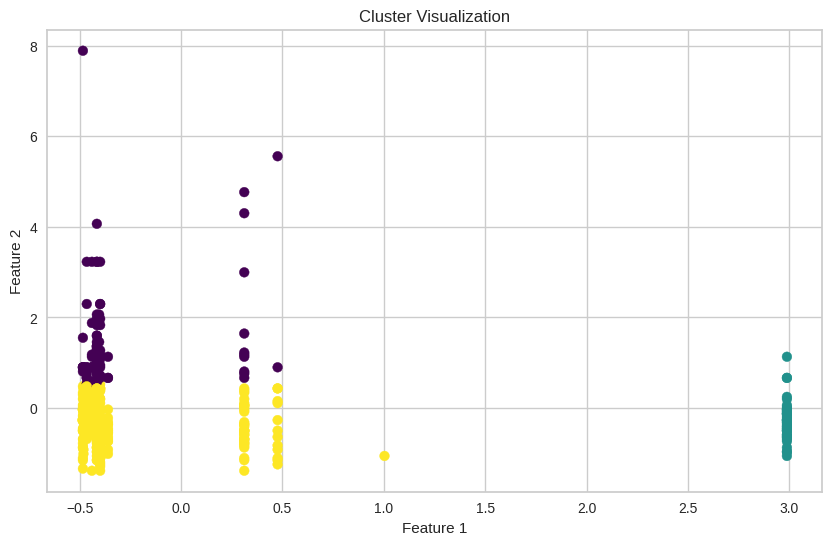

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already performed K-Means clustering and y_kmeans contains cluster labels
plt.figure(figsize=(10, 6))

# Convert X_processed to a dense array if it's a sparse matrix
X_dense = X_processed.toarray()

# Use the dense array for plotting
plt.scatter(X_dense[:, 0], X_dense[:, 1], c=y_kmeans, cmap='viridis')

plt.title('Cluster Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Clustering based on location data (Latitude & Longitude)

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
#Yellowbrick is a Python library that extends the Scikit-learn library with visual analysis and diagnostic tools. It has a better elboe plot.


In [ ]:
# Select the features for clustering - in this case, location coordinates
X_processed_location = data[['Latitude', 'Longitude']]

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_processed_location)

# Define the KMeans model and use the Elbow Visualizer to find the optimal number of clusters
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))



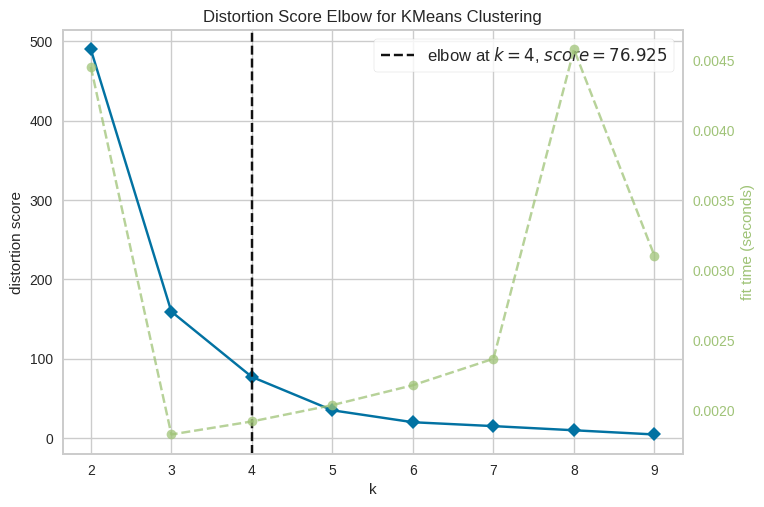

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()               # Finalize and render the figure

In [ ]:
# After determining the optimal number of clusters, fit the KMeans model
optimal_clusters = visualizer.elbow_value_
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters

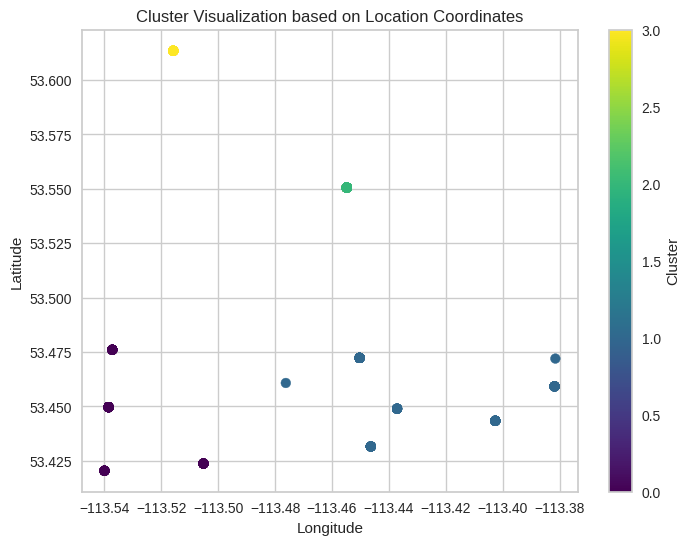

In [ ]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['Longitude'], data['Latitude'], c=data['Cluster'], cmap='viridis', marker='o')
plt.title('Cluster Visualization based on Location Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# Adding the cluster labels to the original dataset for analysis
numeric_data = data.select_dtypes(include=['number'])

# Analyzing the Clusters
cluster_summary = data.select_dtypes(include=['number']).groupby('Cluster').mean()
# Displaying the average features of each cluster
print("Cluster Summary:")
print(cluster_summary)



Cluster Summary:
              ï»¿ID  # of Adult Volunteers  # of Youth Volunteers  \
Cluster                                                             
0        270.914894               2.198582               1.765957   
1        251.185714               2.107143               1.678571   
2        211.336066               1.852459               1.040984   
3        261.325581               2.186047               1.558140   

         Doors in Route  Donation Bags Collected  \
Cluster                                            
0            195.624113                36.482270   
1            181.750000                29.392857   
2            116.188525                24.540984   
3            321.093023                33.790698   

         Completed More Than One Route  Routes Completed  Assessed Value  \
Cluster                                                                    
0                             0.248227          1.262411    6.609665e+05   
1                          

The K-Means clustering algorithm has grouped the properties into 4 clusters based on their **Geographical data**. Complete the values for each.
**YOUR ANSWER HERE**
   *Complete values for the clusters*
### Cluster Summary:
1. **Cluster 0**:
   - **Average Assessed Value (Price)**: $660,966
   - **Average Number of Adult Volunteers**: 2.2
   - **Average Number of Youth Volunteers**: 1.77
   - **Average Donation Bags Collected**: 36.48
   - **Minute Spent Collecting Donation**: 72.55 minutes



2. **Cluster 1**:
   - **Average Assessed Value (Price)**: $9,656,445
   - **Average Number of Adult Volunteers**: 2.11
   - **Average Number of Youth Volunteers**: 1.68
   - **Average Donation Bags Collected**: 29.39
   - **Minute Spent Collecting Donation**: 64.93 minutes

3. **Cluster 2**:
   - **Average Assessed Value (Price)**: $837,500
   - **Average Number of Adult Volunteers**: 1.85
   - **Average Number of Youth Volunteers**: 1.04
   - **Average Donation Bags Collected**: 24.54
   - **Minute Spent Collecting Donation**: 61.23 minutes

   4. **Cluster 3**:
   - **Average Assessed Value (Price)**: $6,666,500
   - **Average Number of Adult Volunteers**: 2,19
   - **Average Number of Youth Volunteers**: 1.56
   - **Average Donation Bags Collected**: 33.79
   - **Minute Spent Collecting Donation**: 71.16 minutes

   *Compare all clusters. *

   - Cluster 1 is the most expensive, with an average assessed value of $9,656,445
   - Cluster 2 is the smallest, with the shortest average time spent collecting donation at 61,23 minutes.

### Interpretation Example:
- **Cluster 0**:  demonstrates the highest collection effort, with the most donation bags collected (36.48) and the longest collection time (72.55 minutes), despite having the lowest property values. The higher number of adult volunteers and time spent on the drive suggest strong community engagement. Therefore, **Cluster 0 excels in donation efforts, showing that active community involvement and volunteer participation are more critical for success than property wealth**.

- **Cluster 1**: Despite having the wealthiest properties, Cluster 1 only collected slightly more donation bags than Cluster 2 (29.39 vs 24.54) and significantly fewer than Cluster 0 (36.48). This suggests that wealthier neighborhoods do not necessarily contribute more to donation drives. The moderate time spent on collection (64.93 minutes) might indicate fewer volunteers or lower engagement in these affluent areas. Therefore, **wealth and youth involvement alone do not guarantee higher collection success in Cluster 1**.

- **Cluster 2**: shows the least community engagement, with the fewest donation bags collected (24.54) and the shortest collection time (61.23 minutes). Despite having assessed values similar to Cluster 0, it underperforms due to lower volunteer involvement and less time spent on collection efforts. Therefore, **Cluster 2 reflects lower volunteer participation, resulting in the lowest number of donation bags collected**.

- **Cluster 3**: shows moderate engagement, collecting a significant number of donation bags (33.79) with a collection time of 71.16 minutes. Although Cluster 3 has relatively high property values ($6,666,500), it falls between Cluster 0 and Cluster 1 in terms of collection success. This cluster benefits from a higher number of adult volunteers and extended collection time, but it doesn't match Cluster 0 performance. Therefore, **Cluster 3 represents a moderately successful cluster, where both property values and community engagement contribute to donation efforts**.


Conclusion:
- Cluster 0 shows the strongest community engagement, collecting the most donation bags and spending the longest time on collections. despite lower property values.
- Cluster 1 represents wealthier neighborhoods but collects fewer donation bags, showing that property value alone does not guarantee higher engagement.
- Cluster 2 has the least engagement, with fewer volunteers and donation bags, even though it has moderately high property values.
- Cluster 3 fails between Cluster 0 and 1 in terms of engagement, showing that higher property values and moderate engagement contribute to a balance in donation collection success.


# Visualizing Clusters on a Geographical Map

`Folium` is a Python library used for creating interactive maps. `Folium` allows you to manipulate data in Python, then visualize it in an interactive Leaflet map, which makes it highly suitable for geographical data visualizations.

The key reasons for using `Folium` to see clusters on a map include:


1. **Visual Interpretation**: Clusters on a map can be visually interpreted to understand geographical patterns. For example, in real estate, mapping clusters can reveal spatial trends, like which areas have higher concentrations of certain types of properties.

2. **Interactive Exploration**: `Folium` maps are interactive, meaning you can zoom in and out, hover over, and click on markers to get more information. This interactivity enhances the user experience and provides a deeper level of engagement with the data.

3. **Data Presentation**: Maps created with `Folium` can be used in reports, presentations, or web applications, making them a powerful tool for communicating findings and insights to a non-technical audience.

4. **Decision Making**: For businesses and organizations, visualizing clusters on a map can aid in strategic planning and decision-making. For example, it can help identify potential locations for new services, stores, or infrastructure based on clustering of demographics or other relevant data.

5. **Insight into Relationships and Patterns**: Visualizing data on a map can reveal relationships and patterns that might not be apparent from raw data. It helps in understanding how different data points are spatially related to each other.

In summary, `Folium` is a valuable tool for anyone working with geographical data. It turns complex geospatial analysis into an easier and more accessible format, helping to uncover hidden patterns and insights in geographic data.

In [ ]:
import folium


# Create a map centered around the mean latitude and longitude
m = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=10)

# Add points to the map
for idx, row in data.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color='blue' if row['Cluster'] == 0 else 'green' if row['Cluster'] == 1 else 'red',
        fill=True,
        fill_color='blue' if row['Cluster'] == 0 else 'green' if row['Cluster'] == 1 else 'red',
        tooltip=f"Cluster: {row['Cluster']}"
    ).add_to(m)

# Display
m


In [ ]:
# Save to an HTML file
m.save('cluster_map.html')

# Make Predictions

In [ ]:
# Assuming the optimal number of clusters is determined to be 4
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_processed_location)


# Evaluating Clusters: Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg_location = silhouette_score(X_processed_location, y_kmeans)
print(f'Silhouette Score: {silhouette_avg_location}')

Silhouette Score: 0.8022238897471149


Silhouette score based on Location is looking good.

# Improving Scores

Improving the Silhouette Score in a clustering task often involves refining the clustering process, tweaking the data, or even reconsidering the choice of the clustering algorithm. Here are several strategies that might help enhance the Silhouette Score:

### 1. **Optimize the Number of Clusters**
   - Revisit the method you used to determine the number of clusters (like the Elbow method). Experiment with different numbers of clusters to see if a different value improves the score.

### 2. **Feature Selection and Engineering**
   - Remove irrelevant or noisy features that might be disrupting the clustering.
   - Consider engineering new features that better capture the inherent groupings in the data.


### 3. **Alternative Clustering Algorithms**
   - Consider using a different clustering algorithm. For example, if K-Means doesn't provide satisfactory results, you might explore hierarchical clustering, DBSCAN, or Gaussian Mixture Models.
   - Each algorithm has its own strengths and is suited to different types of data distributions.

### 4. **Data Quality**
   - Ensure your data is clean and well-prepared. Outliers, missing values, or incorrect data can negatively impact clustering quality.


### 5. **Evaluate with Domain Knowledge**
   - Sometimes, the mathematical assessment might not fully align with the practical, domain-specific interpretation of the clusters. Consult with domain experts to evaluate if the clusters make logical sense.

### 6. **Consider the Nature of the Data**
   - Some datasets may not naturally form well-separated clusters. In such cases, achieving a high Silhouette Score might not be possible, and the focus should be on extracting as much insight as possible with what the data offers.

Remember, clustering is often an exploratory technique, and achieving a perfect score is not always necessary or feasible. The goal should be to find meaningful and useful clusters that aid in understanding the data or solving the specific problem at hand.

# Interview Readiness

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Evaluate clustering with 4 clusters
optimal_k_4 = 4  # Choose the optimal number of clusters based on the Elbow Method plot
kmeans_4 = KMeans(n_clusters=optimal_k_4, random_state=42)
y_kmeans_4 = kmeans_4.fit_predict(X_processed)

silhouette_avg_4 = silhouette_score(X_processed, y_kmeans_4)
print(f'Silhouette Score for {optimal_k_4} clusters: {silhouette_avg_4}')  # Correct variable for 4 clusters

# Evaluate clustering with 2 clusters
optimal_k_2 = 2  # Choose the optimal number of clusters based on the Elbow Method plot
kmeans_2 = KMeans(n_clusters=optimal_k_2, random_state=42)
y_kmeans_2 = kmeans_2.fit_predict(X_processed)

silhouette_avg_2 = silhouette_score(X_processed, y_kmeans_2)
print(f'Silhouette Score for {optimal_k_2} clusters: {silhouette_avg_2}')  # Correct variable for 2 clusters


Silhouette Score for 4 clusters: 0.2899339194066334
Silhouette Score for 2 clusters: 0.5407253882530639


In [ ]:
# Print comparison
print(f"Sihourtte Score Score Comparison:")
print(f"2 Clusters: {silhouette_avg_2}")
print(f"3 Clusters: {silhouette_avg_3}")
print(f"4 Clusters: {silhouette_avg_4}")
print(f"Location Clusters: {silhouette_avg_location}")

Sihourtte Score Score Comparison:
2 Clusters: 0.5407253882530639
3 Clusters: 0.3741330923202608
4 Clusters: 0.2899339194066334
Location Clusters: 0.8022238897471149


1. Change the number of clusters for Property clusters and Location clusters. Does your Silhoette score improve?
2. Based on your analysis, What is the optimal number of clusters? What is the better clustering technique ( Property type or Location)

**YOUR ANSWER HERE**
1. As the number of cluster increases from 2 to 4, the Silhoette score decreases. This suggests that adding more clusters in property-based clustering results in poorly defined clusters with more overlap between them. The highest score for property-based clustering occurs with 2 clusters (0.5407), indicating that 2 clusters might be the optimal number for this approach.
2. The optimal number of clusters for property clustering is 2, as this gives the highest Silhoette score. While the score is moderate, it is the best for this method. However, the optimal of cluster for location clustering is 4, with a much higher Silhoette score of 0.8022. This suggests that 4 clusters produce the most distinct and well-separated groups based on geographical location.

Therefore, Lacation-based clustering (with 4 clusters) is the superior method, as it results in well-defined groups, as evidenced by the higher Silhoette score.